In [4]:
using Pkg

Pkg.activate("..")

# using LinearAlgebra
# using Distributions
using Random
using StatsBase


# using ForwardDiff
using LambertW
using Roots 

using Graphs
using CairoMakie
using GraphMakie
using JLD2

# using DelimitedFiles

include("../Code/MiNet//MiNet.jl")

  Activating project at `~/Projects/Working/HIFMB/MiNet`


Main.MiNet

In [37]:
function plot_bifurcation!(ax, xvec, yvec; args...)
    if any(length.(yvec) .== 3)
        b_order = 0
        #if not all in the multistable
        if !all(length(yvec) .== 3)
            b_order = minimum(yvec[end]) < maximum(yvec[1]) ? :hl : :lh 
        else
            b_order = yvec[end][2] < yvec[1][2] ? :hl : :lh
        end
        
        #plot branches
        if b_order == :hl
            inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], maximum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], minimum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        elseif b_order == :lh
             inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], minimum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], maximum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        end
    else
        lines!(ax, xvec, [y[1] for y = yvec]; args...)
    end
end

plot_bifurcation! (generic function with 1 method)

# Introduction

# Poisson Graphs

In [134]:
#load results
res = load("../Results/JLD2/fig_1.jld2")
sim_mat = res["sim"]
pred_mat = res["pred"]
b0_sols,c0_sols = res["phase"]

(Vector[[0.3678779775776458, 0.36788246848374395] [0.1921037626945995] … [0.06601189614262093] [0.0660102020857272]; [0.5987521512648808] [0.23289445739362424, 0.3629849474246935, 0.5219399219940397] … [0.06133202293987158] [0.06133036254942721]; … ; [0.9995144203938927] [0.9995144030295645] … [4.9102027365913584e-5, 0.17537359531740518, 0.9995127100777783] [4.908512301996606e-5, 0.1787488322535957, 0.9995126925353452]; [0.9995455427150419] [0.9995455275064458] … [4.562335388948242e-5, 0.1712161491767461, 0.999544045214965] [4.560741255589713e-5, 0.17455280027406955, 0.9995440298604361]], Vector[[0.6321190952318496, 0.6321235861284034] [0.4012478487351202] … [0.00048557960610728923] [0.00045445728495807636]; [0.807896237305401] [0.47806007800595995, 0.6370150525753033, 0.7671055426063755] … [0.0004855969704354868] [0.0004544724935542366]; … ; [0.9339881038573791] [0.9386679770601284] … [0.00048728992222168976, 0.8246264046825948, 0.999950897972634] [0.00045595478503501763, 0.8287838508

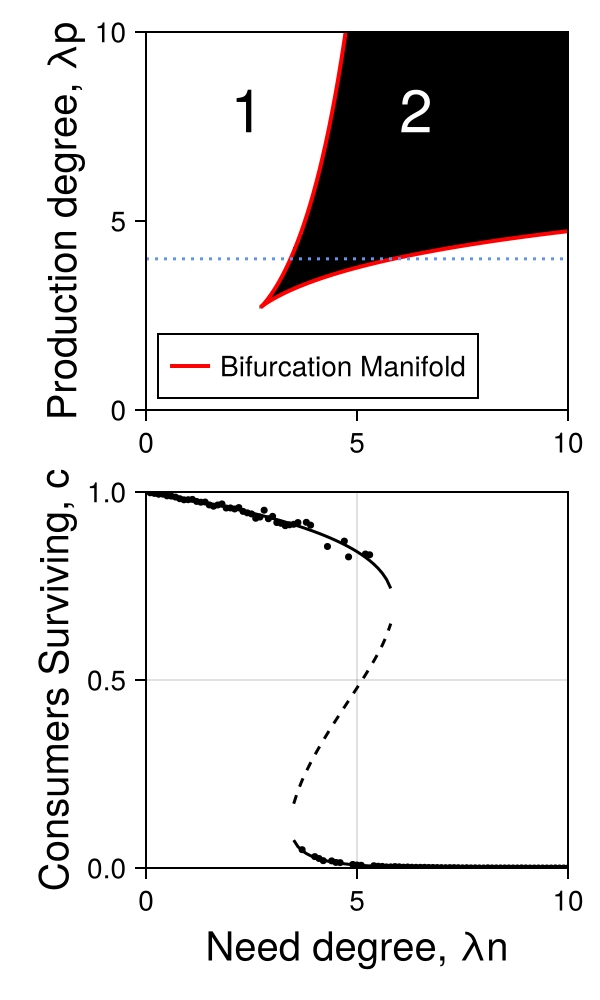

In [136]:
#params
n_l = 100
l_vec = range(exp(1), 10.0, length = n_l)

n_l_sim = 100
l_vec_sim = range(0.1, 10.0, length = n_l_sim)

ρ = 0.0
N = 10000
p_vec = [4.0]



#plot
f = Figure(size = (300,500))

style = (xlabelsize = 20, ylabelsize = 20)

ax = Axis(f[1,1],
                  ylabel = "Production degree, λp",
                    limits = (0,10.0,0,10.0); style...)

hidedecorations!(ax,ticklabels=false,ticks=false, label = false)

#plot phase space
N_b0 = length.(b0_sols)
heatmap!(ax, l_vec, l_vec, N_b0', colormap = cgrad(:greys, rev = true))

# #plot manifolds
λc = l_vec
λb = hcat(MiNet.bifurcation_manifold.(λc)...)

lines!(ax, λc, λb[1,:], color = "red", linewidth = 2, label = "Bifurcation Manifold")
lines!(ax, λc, λb[2,:], color = "red", linewidth = 2)

# #plot slice
hlines!(ax, p_vec, linestyle = :dot, color = :cornflowerblue)

text!(ax, 2, 7, text = "1", color = "black", fontsize = 30)
text!(ax, 6, 7, text = "2", color = "white", fontsize = 30)

axislegend(ax=ax, position = :lb)

# #plotting
ax = Axis(f[2,1], xlabel = "Need degree, λn", ylabel = "Consumers Surviving, c", limits = (0,10.0,0,1.0);style...)

for j = 2
    c = :black #resample_cmap(:reds, length(p_vec))[j]
    plot_bifurcation!(ax, l_vec_sim, pred_mat[:,j,1], color = c)
    for i = eachindex(l_vec_sim)
            
            #sim
            y = [sim_mat[i,j,1]]
            x = fill(l_vec_sim[i], length(y))
            # lb = quantile(y,0.05)
            # ub = quantile(y,0.95)
            # errorbars!(ax, [mean(x)],[mean(y)],[mean(y) - lb],[mean(y) - ub], color = "black")
            scatter!(ax, x ,y, markersize = 5, color = c)
    end
end

f

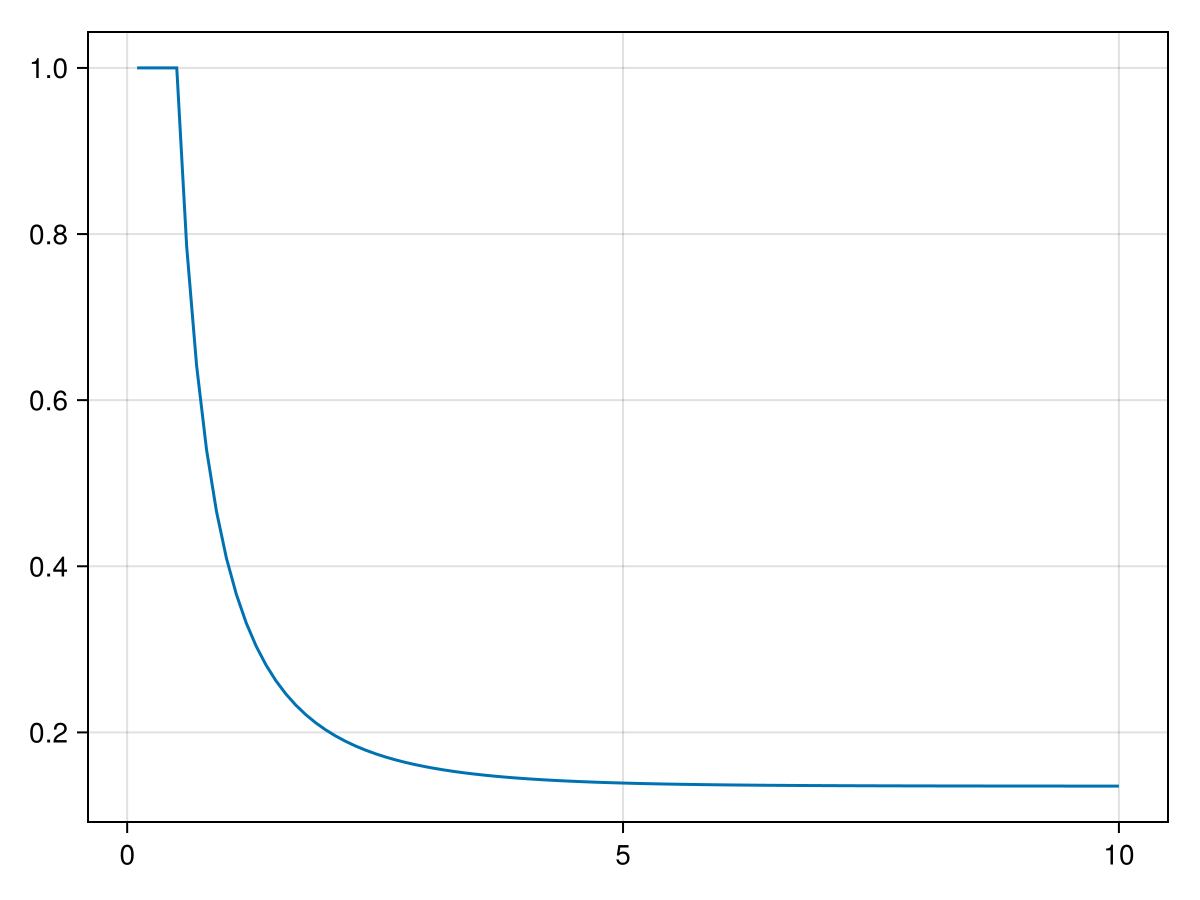

In [129]:
fig = Figure()
ax = Axis(fig[1,1])
plot_bifurcation!(ax, z_vec_sim, pred_mat[:,1,1])
fig

In [40]:
save("../Results/Figures/PhaseTrans.pdf", f)

CairoMakie.Screen{PDF}


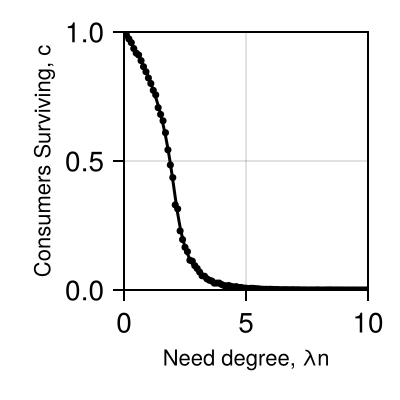

In [140]:
f = Figure(size = (200,200))

style = (xlabelsize = 11, ylabelsize = 11)
ax = Axis(f[1,1], xlabel = "Need degree, λn", ylabel = "Consumers Surviving, c", limits = (0,10.0,0,1.0);style...)

for j = 1
    c = :black #resample_cmap(:reds, length(p_vec))[j]
    plot_bifurcation!(ax, l_vec_sim, pred_mat[:,j,1], color = c)
    for i = eachindex(l_vec_sim)
            
            #sim
            y = [sim_mat[i,j,1]]
            x = fill(l_vec_sim[i], length(y))
            # lb = quantile(y,0.05)
            # ub = quantile(y,0.95)
            # errorbars!(ax, [mean(x)],[mean(y)],[mean(y) - lb],[mean(y) - ub], color = "black")
            scatter!(ax, x ,y, markersize = 5, color = c)
    end
end

f

In [141]:
save("../Results/Figures/PhaseTrans_inset.pdf", f)

CairoMakie.Screen{PDF}


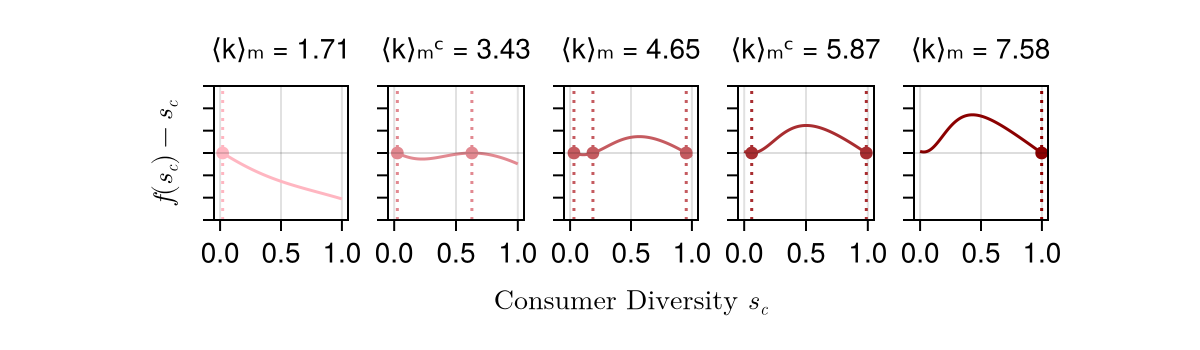

In [7]:
## bifurcation plot
F(X,Y,λ) = exp(λ[1]*(X − 1) + λ[2]*(Y − 1) + λ[3]*(X*Y − 1))

λn = 4.0
#get critical points
λc_crit = MiNet.bifurcation_manifold(λn) |> sort

d = [λc_crit[1] / 2, λc_crit[1], mean(λc_crit), λc_crit[2],λc_crit[2] + λc_crit[1] / 2]

lc_vec = [[λn, l, 0.0] for l = d]
lm_vec = [[l, λn, 0.0] for l = d]

C_vec = [x -> F(x[1],x[2],l) for l = lc_vec]
M_vec = [x -> F(x[1],x[2],l) for l = lm_vec]



f = Figure(size = (600,175))
x_vec = range(0,1.0, length = 100)

for i = eachindex(d)
    ax = Axis(f[1,i], aspect = 1)
    hidedecorations!(ax, grid = false, ticks = false,ticklabels=false)
    hideydecorations!(ax, ticks=false)
    f_sol = MiNet.arrival_prop_funcs.(C_vec[i], M_vec[i])
    b1(x) = f_sol[:b](f_sol[:c](x)) - x

    c = resample_cmap(:reds, length(d))[i]
    style = d[i] ∈ λc_crit ? :dash : :solid

    #find solutions
    y_vec = b1.(x_vec)
    lines!(ax, x_vec, y_vec, color = c)

    sol = find_zeros(b1, -0, 1)
    scatter!(ax, sol, fill(0.0,length(sol)), color = c)
    vlines!(ax, sol, color = c, linestyle = :dot)
    
    hlines!(ax, 0.0, color = :black, linewidth = 0.1)
    
    if d[i] ∉ λc_crit
        Label(f[0,i], "⟨k⟩ₘ = $(round(d[i],digits = 2))")
    else
        Label(f[0,i], "⟨k⟩ₘᶜ = $(round(d[i],digits = 2))")
    end

    ylims!(ax, -0.75,0.75)
end

# linkyaxes!(f.content...)

Label(f[2,1:5],L"\text{Consumer Diversity} \ s_c")
Label(f[1,0 ],L"f(s_c) - s_c", rotation = pi/2, tellheight = false)

# [colsize!(f.layout, i, Auto()) for i = 1:5]
# resize_to_layout!(f)

colgap!(f.layout, 10)
rowgap!(f.layout, 10)

f

In [70]:
save("../Results/Figures/selfconsistency.svg", f)

CairoMakie.Screen{SVG}


# Consumer and Resource Supply

Next we consider what happens as we supply consumer or resources in the system. This is equivelent to fixing some proportion of the nodes states as persisting. 

In [181]:
A(X, s) = s + (1-s)*X # remove proportion s / keep proportion (s-1)
F(X,Y,λ) = exp(λ[1]*(X − 1) + λ[2]*(Y − 1) + λ[3]*(X*Y − 1))

λn=4.0
λp=10.0

#generate p_list
n_s = 100
s_vec = range(0.0, 0.99, length = n_s)
ρ = 0.0

# p_mat = [([λn,λp, ρ*sqrt(λn*λp)], [λp,λn, ρ*sqrt(λn*λp)]) for λn = l_vec, λp = l_vec]

b0_s_sols = Matrix{Vector}(undef,n_s, n_s)
c0_s_sols = similar(b0_s_sols)

k = [0]

Threads.@threads for i = 1:n_s
    for j = 1:n_s
        
        k[1] += 1
        if k[1] % 100 == 0
            print("\r", k)
        end

        #remove eb - 1 species
        eb = s_vec[i]
        #supply ec resources
        ec = s_vec[j]

        B(x) = F(A(x[1], ec), A(x[2], ec),  [λn,λp,0.0]) 
        C(x) = F(A(x[1], eb), A(x[2], eb),  [λp,λn,0.0]) 

        b0,c0 = MiNet.solve_arrival_probs(B,C)
        
        
        b0_s_sols[i,j] = b0 
        c0_s_sols[i,j] = c0
    
    end
end

LoadError: cannot define function A; it already has a value

In [8]:
f = Figure(size = (1200,600))
ax = Axis(f[1,1], xlabel = "consumers removed", ylabel = "resources supplied")
axm = [Axis(f[1,1 + i]) for i = 1:3]

n_s = 100
s_vec = range(0.0, 0.99, length = n_s)


for i = 1:n_s
    for j = 1:n_s
        if length(b0_s_sols[i,j]) == 1
            scatter!(ax,s_vec[i], s_vec[j], color = b0_s_sols[i,j][1],colorrange = (0,1))
        else
            for k = 1:3
                scatter!(axm[k],s_vec[i],s_vec[j],color = b0_s_sols[i,j][k],colorrange = (0,1))
            end
        end
    end
end

ax = Axis(f[2,1], xlabel = "consumers removed", ylabel = "resources supplied")
axm = [Axis(f[2,1 + i]) for i = 1:3]

n_s = 100
s_vec = range(0.0, 0.99, length = n_s)

for i = 1:n_s
    for j = 1:n_s
        if length(b0_s_sols[i,j]) == 1
            scatter!(ax,s_vec[i],s_vec[j], color = c0_s_sols[i,j][1],colorrange = (0,1))
        else
            for k = 1:3
                scatter!(axm[k],s_vec[i],s_vec[j],color = c0_s_sols[i,j][k],colorrange = (0,1))
            end
        end
    end
end


linkaxes!(f.content...)

f

LoadError: UndefVarError: `b0_s_sols` not defined

In [873]:


# f = Figure()
# ax1 = Axis(f[1,1], title = "Consumers persisting")
# ax2 = Axis(f[1,2], title = "Resources persisting")

# Label(f[2,1:2], "Consumers Removed", tellheight = true)

# ax3 = Axis(f[3,1])
# ax4 = Axis(f[3,2])

# Label(f[4,1:2], "Resources Supplied", tellheight = true)


# for i = 1:20:n_s
#     yvec = b0_s_sols[:,i]
#     color = 1
    
#     plot_bifurcation!(ax1, s_vec, b0_s_sols[:,i], color = i, colorrange = (1,n_s))
#     plot_bifurcation!(ax2, s_vec, c0_s_sols[:,i], color = i, colorrange = (1,n_s))

#     plot_bifurcation!(ax3, s_vec, b0_s_sols[i,:], color = i, colorrange = (1,n_s))
#     plot_bifurcation!(ax4, s_vec, c0_s_sols[i,:], color = i, colorrange = (1,n_s))

# end
#     f

## supply simulations

In [878]:
#network size
N = 5000
#average degree: need produce covariance
λn,λp,λr = 4.0, 10.0, 0.0

n_r = 10

#create network and set initial state
g = MiNet.generate_network(N, λn, λp, λr);
c = fill(false, 2N)
c[1:N] .= true
s = fill(true, 2N);

b0_sim_sols = Array{Float64,3}(undef,n_s, n_s, n_r)
c0_sim_sols = similar(b0_sim_sols)

#create network and set initial state
g = MiNet.generate_network(N, λn,λp,λr);
c = fill(false, 2N)
c[1:N] .= true
s = fill(true, 2N);

rep = [0]
Threads.@threads for i = 1:n_s
    for j = 1:n_s

        c_copy = deepcopy(c)
        g_copy = deepcopy(g)
        
        k[1] += 1
        if k[1] % 100 == 0
            print("\r", k)
        end

        b_rm = sample(1:N, Int(floor(s_vec[i]*N)), replace = false)
        c_rm = sample(N+1:2N, Int(floor(s_vec[j]*N)), replace = false)

        to_rm = vcat(b_rm, c_rm)
        to_keep = filter( x -> x ∉ to_rm, 1:2N)

        rem_vertices!(g_copy, to_rm, keep_order = true)
        c_copy = c_copy[to_keep]
    
        for r = 1:n_r
            s = MiNet.get_state(g_copy, c_copy, rand(); Nt = 100, ts = false)
            b0_sim_sols[i,j,r] = mean(s[c_copy])
            c0_sim_sols[i,j,r] = mean(s[.!c_copy])
        end
    end
end

[69600]

## Plotting

In [17]:
res = load("../Results/JLD2/fig_2.jld2")
b0_sim,c0_sim = res["sim"]
b0_pred,c0_pred = res["pred"]

(Vector[[0.9998180861736164] [0.9998199084295254] … [0.9999963678802942] [0.9999981839714792]; [0.999798921566586] [0.9998009361205569] … [0.9999959858739742] [0.9999979929748536]; … ; [0.018589544577476944] [0.019357044707513007] … [0.9358081658470663] [0.9675750376789316]; [0.018451191546311783] [0.01920853202788408] … [0.9296959362676478] [0.9643289256841854]], Vector[[0.9999545174063224] [0.999954518235124] … [0.9999545984212278] [0.9999545992457544]; [0.9999497253369019] [0.999949726339574] … [0.99994982332397] [0.9999498243209857]; … ; [0.003711006049535004] [0.0038639246992090426] … [0.1706903184004166] [0.17594253096964552]; [0.0018434179687413232] [0.0019190095449290734] … [0.08877879319297499] [0.09192916614355695]])

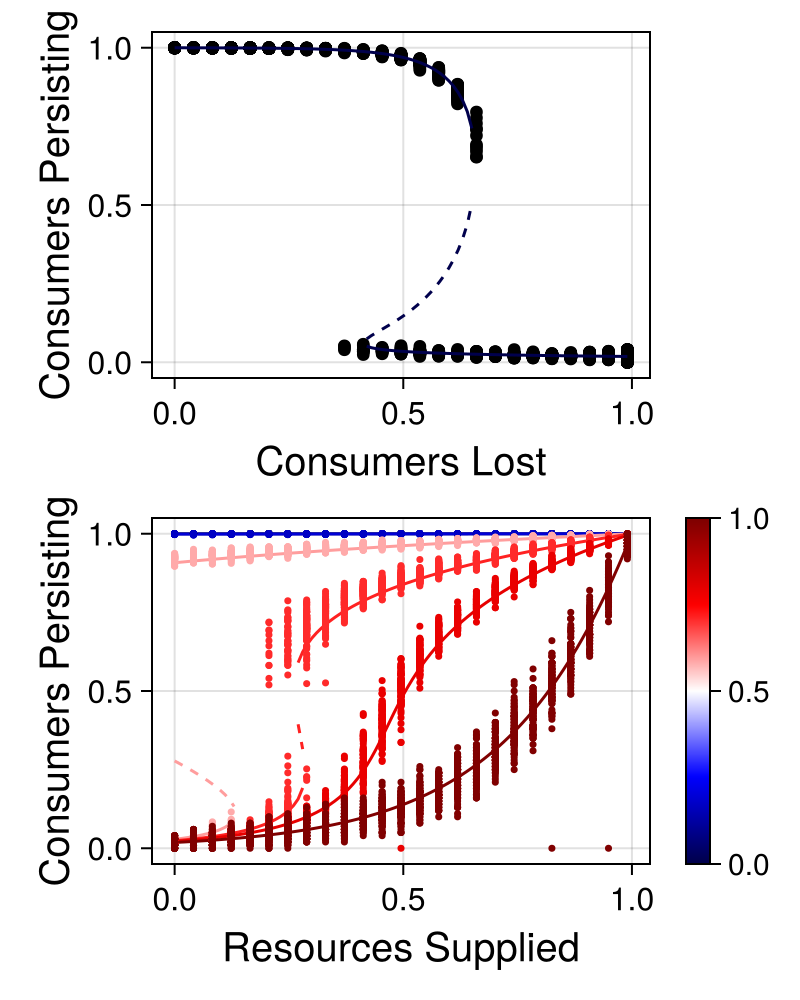

In [18]:
#Parameters
λn=4.0
λp=10.0

#generate p_list
n_s = 100
s_vec = range(0.0, 0.99, length = n_s)

#network simulations
#network size
n_s_network = 25
s_vec_network = range(0.0, 0.99, length = n_s_network)

N = 10000
n_r = 100
n_rep = 1

f = Figure(size = (400,500))

style = (xlabelsize = 20, ylabelsize = 20, xticklabelsize = 16, yticklabelsize = 16)

ax = Axis(f[1,1], xlabel = "Consumers Lost", ylabel = "Consumers Persisting"; style...)

#initial consumer bifurcation
c = resample_cmap(:seismic, n_s)[1]
for i = 1:25
    s = s_vec_network[i]
    scatter!(ax, fill(s, 100), b0_sim[:,i,1,1], color = :black)
end
plot_bifurcation!(ax, s_vec, b0_pred[:,1], color = c)


#varying consumer supply
ax2 = Axis(f[2,1], xlabel = "Resources Supplied", ylabel = "Consumers Persisting", ; style...)
for i = [1,20,60,72,80,100] 
    c = resample_cmap(:seismic, n_s)[i]
    plot_bifurcation!(ax2, s_vec, b0_pred[i,:], color = c)
end

for i =  [1,5,15,18,20,25] 
    c = resample_cmap(:seismic, n_s_network)[i]
    series!(ax2, s_vec_network, b0_sim[:,i,:,1], solid_color = c, linewidth = 0, markersize = 5)
end


Colorbar(f[2,2], colormap = :seismic, colorrange = (0,1), ticklabelsize = 15)

linkaxes!(ax,ax2)

# # save("../Results/Figures/removal_plots.pdf", f)

f

# Correlated

In [92]:
function plot_bifurcation!(ax, xvec, yvec; args...)
    if any(length.(yvec) .== 3)
        b_order = 0
        #if not all in the multistable
        if !all(length(yvec) .== 3)
            b_order = minimum(yvec[end]) < maximum(yvec[1]) ? :hl : :lh 
        else
            b_order = yvec[end][2] < yvec[1][2] ? :hl : :lh
        end
        #plot branches
        if b_order == :hl
            inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], maximum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], minimum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        elseif b_order == :lh
             inde = findlast(length.(yvec) .== 3)
            lines!(ax, xvec[1:inde], minimum.(yvec[1:inde]); args...)
            
            inds = findfirst(length.(yvec) .== 3)
            lines!(ax, xvec[inds: end], maximum.(yvec[inds:end]); args...)
        
            lines!(ax, xvec[inds:(inde)], [y[2] for y = yvec[inds: (inde) ]]; linestyle = :dash, args...)
        end
    else
        lines!(ax, xvec, [y[1] for y = yvec]; args...)
    end
end

plot_bifurcation! (generic function with 1 method)

In [97]:
#params
n_l = 50
l_vec = range(exp(1), 10.0, length = n_l)
n_cor = 6
cor_vec = range(0,1.0, length = n_cor) 

ρ = 0.0
N = 100
p_vec = [4.0]

1-element Vector{Float64}:
 4.0

In [98]:
res = load("../Results/JLD2/fig_cor.jld2")
b0_phase,c0_phase = res["phase"];
b0_sim,c0_sim = res["sim"]

b0_phase[isempty.(b0_phase)] .= Ref([])
b0_sim[isempty.(b0_sim)] .= Ref([]);

In [99]:
f = Figure(size = (700,400))

for i = 1:6
    ax = Axis(f[(i-1) ÷ 3, (i-1) % 3])
    heatmap!(ax,l_vec, l_vec, length.(b0_phase)[:,:,i], colorrange = (0,3))
    text!(7,2.75,text=string("ρ = ",cor_vec[i]), color = :white, fontsize = 18)
    hlines!(ax, l_vec[[10,15,20]], color = :white, linestyle = :dash)
end

Label(f[2,0:2], "Requirement degree, z_c", fontsize = 20)
Label(f[0:1,-1], "Production degree, z_m", rotation = pi/2, fontsize=20)

f

LoadError: invalid redefinition of constant Main.f

In [407]:
save("../Results/Figures/correlation_phase.svg", f)
save("../Results/Figures/correlation_phase.pdf", f)

CairoMakie.Screen{PDF}


In [101]:
l_vec[[10,15,20]]

3-element Vector{Float64}:
 4.055740268129833
 4.798772734613603
 5.541805201097374

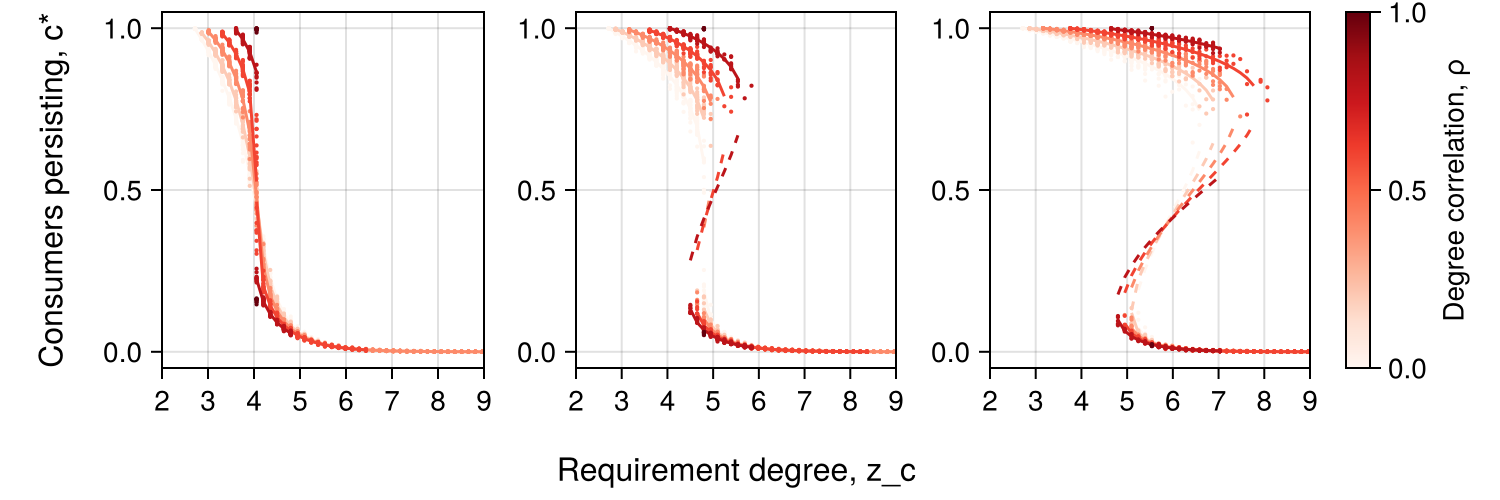

In [412]:
f = Figure(size=(750,250))

for (k,v) = enumerate([10,15,20])
    ax = Axis(f[1,k])
    xlims!(ax,2,9)
    n = v
    for i = 1:6
        c = resample_cmap(:Reds_9, 6)[i]
        ind = .!isempty.(b0_phase[:,n,i])
        plot_bifurcation!(ax,l_vec[ind], b0_phase[ind,n,i], color = c)
        for j = findall(ind)
            scatter!(ax, fill(l_vec[j], 20), vcat(b0_sim[j,n,i]...), color = c, markersize = 3)
        end
    end    
end

Colorbar(f[1,4], colorrange = (0,1), colormap = :Reds_9, label = "Degree correlation, ρ")

Label(f[2,1:3], "Requirement degree, z_c", fontsize = 16)
Label(f[1,0], "Consumers persisting, c*", rotation = pi/2, fontsize = 16)

f

In [2]:
save("../Results/Figures/correlation_bifurcation.svg", f)
save("../Results/Figures/correlation_bifurcation.pdf", f)

LoadError: UndefVarError: `f` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [95]:
#params
n_l = 50
l_vec = range(0.01, 10.0, length = n_l)

l_vec[[10,15,20]]

3-element Vector{Float64}:
 1.8448979591836734
 2.8642857142857143
 3.8836734693877553

# Power-law graphs

In [49]:
include("../Code/MiNet/MiNet.jl")

Main.MiNet

  0.513408 seconds (749.27 k allocations: 53.161 MiB, 3.78% gc time, 70.76% compilation time)


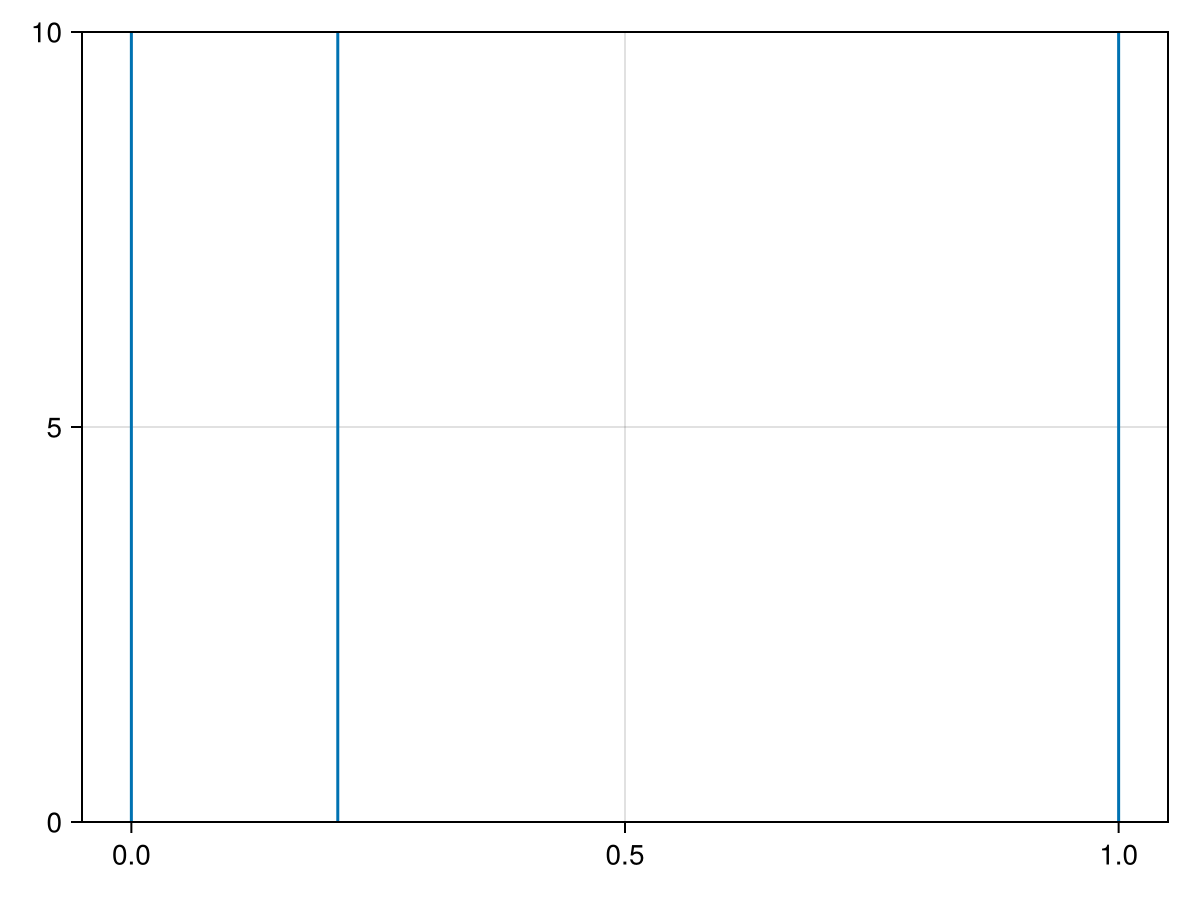

In [51]:
sc=0.0
sm=0.0

function get_sol(sc,sm)
    pc = MiNet.zipf_p(1000, sc)
    pm = MiNet.zipf_p(1000, sm)
    
    C(x) = MiNet.empirical_PGF(x, pc)
    M(x) = MiNet.empirical_PGF(x, pm)

    f(x) = C(1-M(1-x))-x

    return find_zeros(f,-1e-4,1+1e-4)
end

x_vec = range(0,1,length=1000)

fig = Figure()
ax = Axis(fig[1,1])

@time sol = get_sol(sc,sm)

vlines!(ax, sol)
fig

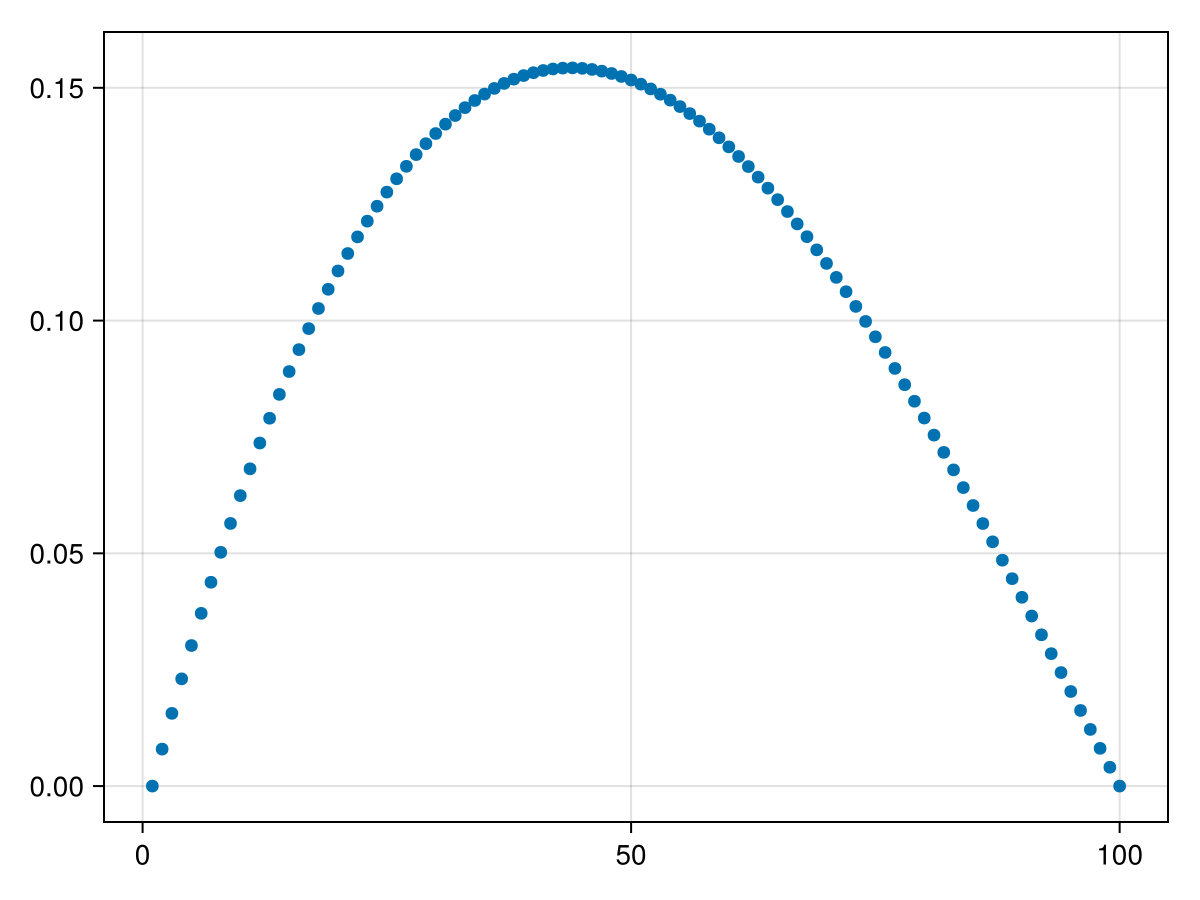

In [93]:
sc = 0.9
sm = 0.5

pc = [sc, 0.0, 1 - sc]
pm = [sm, 0.0, 1 - sm]
    
C(x) = MiNet.empirical_PGF(x, pc)
M(x) = MiNet.empirical_PGF(x, pm)

f(x) = C(1 - M(1-x)) - x

f.(range(0,1,length = 100)) |> plot

In [48]:
N=6000

sum(MiNet.zipf_p(N, 2.0) .* collect(1:N))

5.640197917817724

In [6]:
using Distributions

In [7]:
function empirical_PGF_deriv(x::Float64, p)
     v = 0
    for k = eachindex(p)
        v += k * x[1]^(k-1) * p[k]
    end
    return(v)
end

empirical_PGF_deriv (generic function with 1 method)

In [66]:
Random.seed!(1)

Ns = 25
s_vec = range(0.0,1.0, length = Ns)

res_s = Matrix{Any}(undef, Ns,Ns)
res_d = Matrix{Any}(undef, Ns,Ns)
res_stable = Matrix{Any}(undef, Ns,Ns)

Threads.@threads for i = 1:Ns
    for j = 1:Ns
        # pc = MiNet.zipf_p(500, s_vec[i])
        # pm = MiNet.zipf_p(500, s_vec[j])

        # pc = pdf.(Ref(Geometric(s_vec[i])),1:500)
        # pm = pdf.(Ref(Geometric(s_vec[j])),1:500)

        pc = [0.0, s_vec[i],0.0, 1 - s_vec[i]]
        pm = [0.0, s_vec[j],0.0, 1 - s_vec[j]]
        
        
        C(x) = MiNet.empirical_PGF(x, pc)
        M(x) = MiNet.empirical_PGF(x, pm)
        
        dC(x) = empirical_PGF_deriv(x, pc)
        dM(x) = empirical_PGF_deriv(x, pm)

        f(x) = C(1-M(1-x)) - x
        g(x) = dC(1-M(1-x)) * dM(1-x) - 1
        
        res_s[i,j] = find_zeros(f,-1e-4,1+1e-4)
        res_d[i,j] = g.(res_s[i,j])
        # res_stable[i,j] = res_s[i,j][res_d[i,j] .< 0][1]
    end
end

In [68]:
for i = 1:Ns
    for j = 1:Ns
        res_stable[i,j] = res_s[i,j][res_d[i,j] .< 0]
    end
end

length.(res_stable)

25×25 Matrix{Int64}:
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 2  

In [133]:
fig = Figure()
ax = Axis(fig[1,1])

y = res_s[50,:]
stab = res_d[50,:]

#get stable/unstable parts
y1 = [r[1] for r = y]
s1 = [r[1] for r = stab]
lines!(ax, s_vec[s1 .<= 0], y1[s1 .<= 0], color = :red)
lines!(ax, s_vec[s1 .>= 0], y1[s1 .>= 0], color = :red,linestyle = :dash)

y2 = [r[end] for r = y]
s2 = [r[end] for r = stab]
lines!(ax, s_vec[s2 .<= 0], y2[s2 .<= 0], color = :blue)
lines!(ax, s_vec[s2 .>= 0], y2[s2 .>= 0], color = :blue,linestyle = :dash)


y3 = [length(r) == 3 ? r[2] : Inf for r = y]
s3 = [length(r) == 3 ? r[2] : Inf for r = stab]
lines!(ax, s_vec[s3 .<= 0], y3[s3 .<= 0], color = :green)
lines!(ax, s_vec[s3 .>= 0], y3[s3 .>= 0], color = :green, linestyle = :dash)

# lines!(ax,s_vec, y2)


# # lines!(ax,s_vec[indx],y3[indx])

fig

LoadError: BoundsError: attempt to access 10×10 Matrix{Any} at index [50, 1:10]

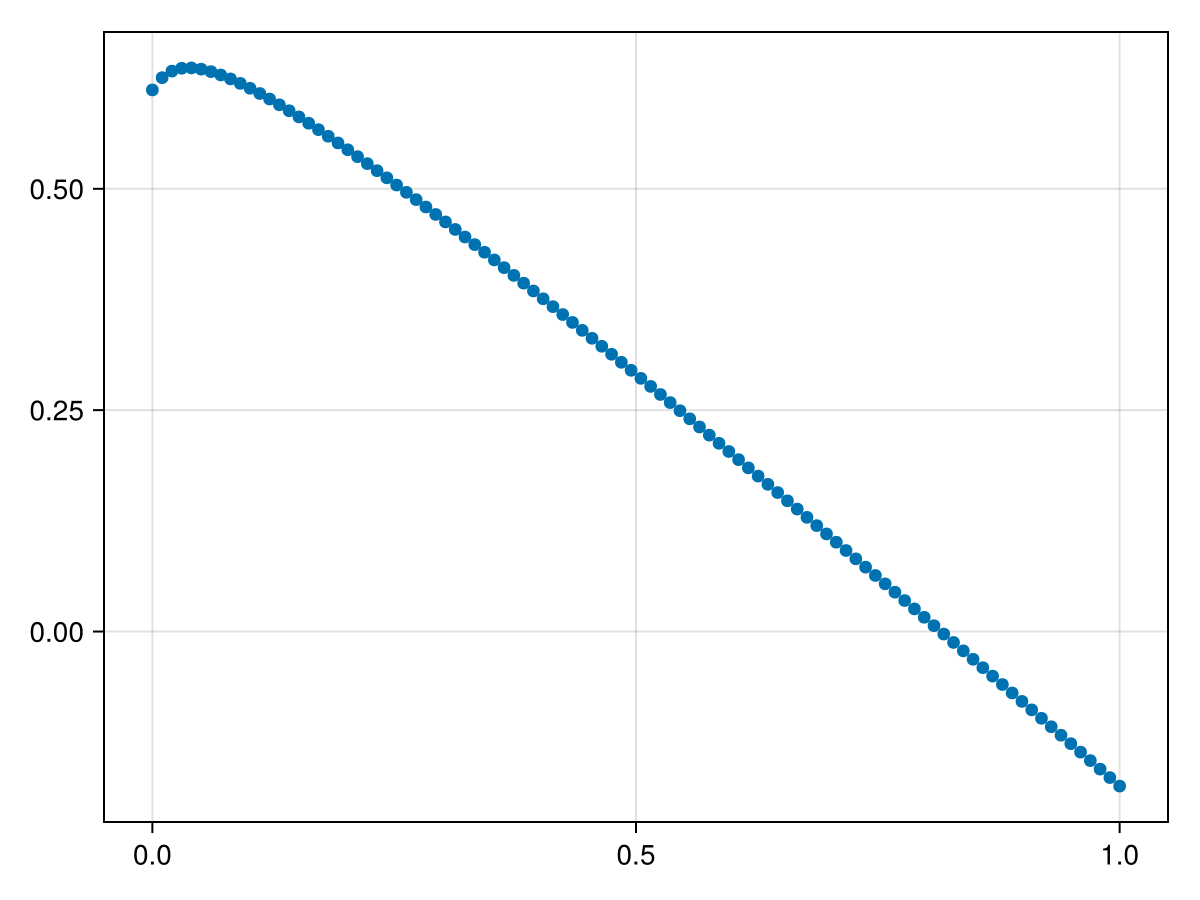

In [102]:
i = 50
j = 50

pc = MiNet.zipf_p(100, 2.0)
pm = MiNet.zipf_p(100, 1.0)

C(x) = MiNet.empirical_PGF(x, pc)
M(x) = MiNet.empirical_PGF(x, pm)
        
f(x) = C(1-M(1-x)) - x

x_vec = range(0,1,length = 100)

plot(x_vec, f.(x_vec))

In [103]:
using Distributions

#powerlaw empirical
function sample_k(N,Kmax,s)
    cum_p = MiNet.zipf_p(Kmax,s) |> cumsum
    k = [findfirst(rand() .< cum_p) for i = 1:N]
end

#preallocate prob-product
function make_p_mat(Kmax,s)
    #zipf mat
    p = MiNet.zipf_p(Kmax, s)
    return(p .* p') 
end
    
#resample individual vector
function resample!(x, Kmax, s, p_mat)
    #sample to switch
    ind = sample(1:length(x), 2, replace = false)
    #total degrees to allocate
    Q = sum(x[ind])
    #get combinations
    p = [[i,Q-i] for i = max(1,Q - Kmax):min(Q-1, Kmax)]
    #get prob of each combination from pdf
    w = [p_mat[i,j] for (i,j) = p]
    
    sam = sample(p, Weights(w))

    @assert sum(sam) == Q
    
    x[ind] .= sam
end

function power_law_degrees(N,Kmax,sc,sm)
    #allocate p_mats
    p_mat_c = make_p_mat(Kmax,sc)
    p_mat_m = make_p_mat(Kmax,sm)
    
    Kco = sample_k(N,Kmax,sc)
    Kmo = sample_k(N,Kmax,sm)

    Kmi = deepcopy(Kco)
    for i = 1:1000
        resample!(Kmi, Kmax, sc, p_mat_c)
    end
    shuffle!(Kmi)
    
    Kci = deepcopy(Kmo)
    for i = 1:1000
        resample!(Kci, Kmax, sm, p_mat_m)
    end
    shuffle!(Kci)

    if sum(Kci) != sum(Kmo)
        print(sum(Kci)," ",sum(Kmo))
    end
    
    return(Kci, Kco, Kmi, Kmo)
end

power_law_degrees (generic function with 1 method)

In [104]:
function power_law_c(N,sc,sm)
    c = vcat(fill(true, N), fill(false,N))
    g = MiNet.generate_network(N, power_law_degrees, N, sc, sm)
    
    is = rand()
    s = MiNet.get_state(g, c, is)

    mean(s[c])
end



power_law_c (generic function with 1 method)

In [112]:
using BenchmarkTools

@time power_law_degrees(5000,2000,2,2) # 68.369 μs (0 allocations: 0 bytes)
# @btime cobexp(a,b,c)    # 17.991 μs (0 allocations: 0 bytes)
# @btime eulerexp(a,b,c)  #  7.197 μs (0 allocations: 0 bytes)


  0.232093 seconds (110.90 k allocations: 189.508 MiB, 70.77% gc time)


([1, 2, 1, 1, 1, 21, 3, 1, 1, 4  …  1, 3, 1, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 2, 2, 2, 1, 2, 2, 3  …  1, 1, 4, 1, 3, 2, 5, 3, 4, 1], [1, 1, 2, 1, 2, 12, 2, 2, 2, 1  …  1, 1, 2, 1, 2, 15, 3, 4, 1, 2], [1, 4, 1, 1, 1, 5, 1, 1, 1, 3  …  4, 1, 2, 13, 6, 1, 1, 1, 1, 1])

In [123]:
Ns = 10
Nrep = 10

res = zeros(Ns,Ns,Nrep)

s_vec = range(2.0,3.0,length = Ns)

count = [0,0,0]

Threads.@threads for i = 1:Ns
    count[1] += 1
     for j = 1:Ns
        count[2] += 1
         for k = 1:Nrep
            print("\r", count)
            Random.seed!(i*j*k)
            res[i,j,k] = power_law_c(1000,s_vec[i],s_vec[j])
            count[3] += 1
        end
    end
end

[10, 100, 999]7]16, 106], 144]8, 27, 251] 41, 353]8, 52, 461]] 687], 83, 765]

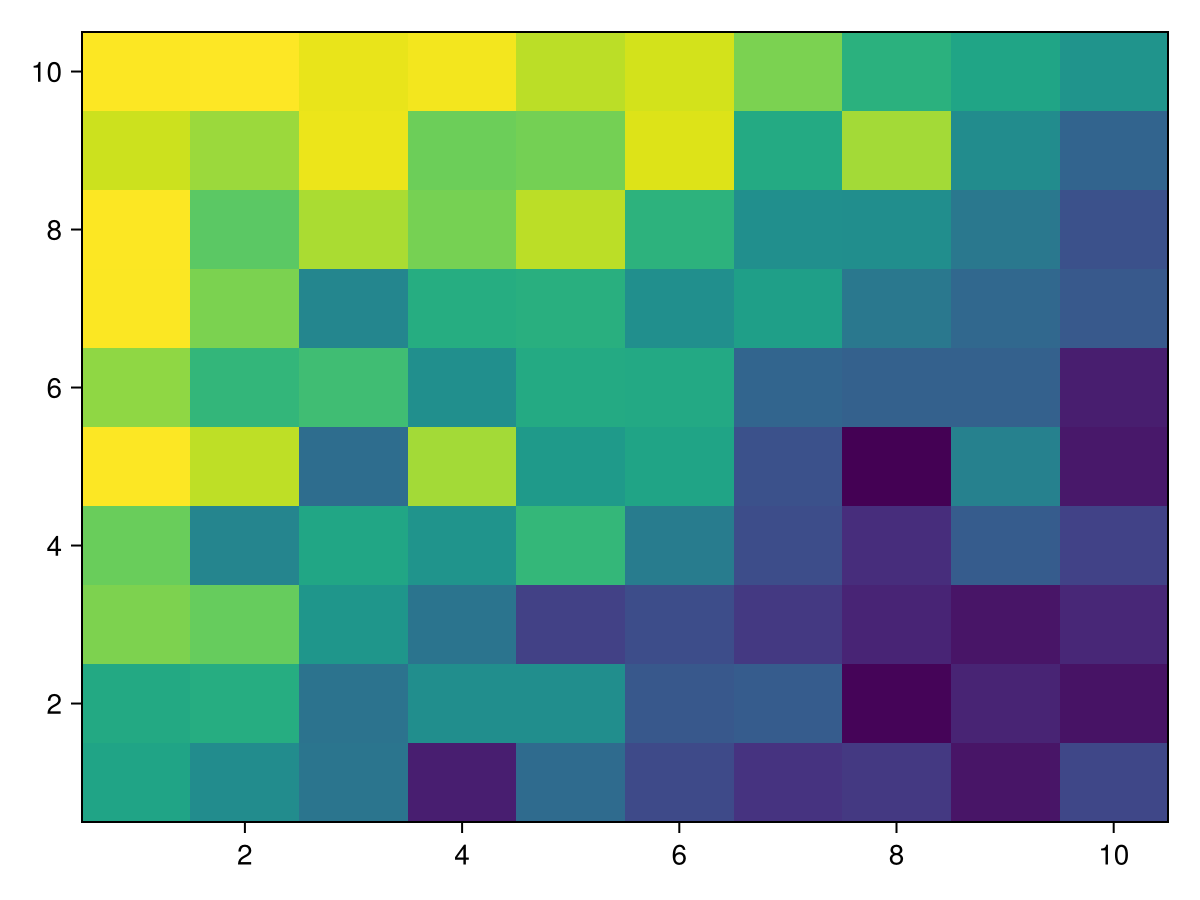

In [128]:
mean(res,dims=3)[:,:,1] |> plot

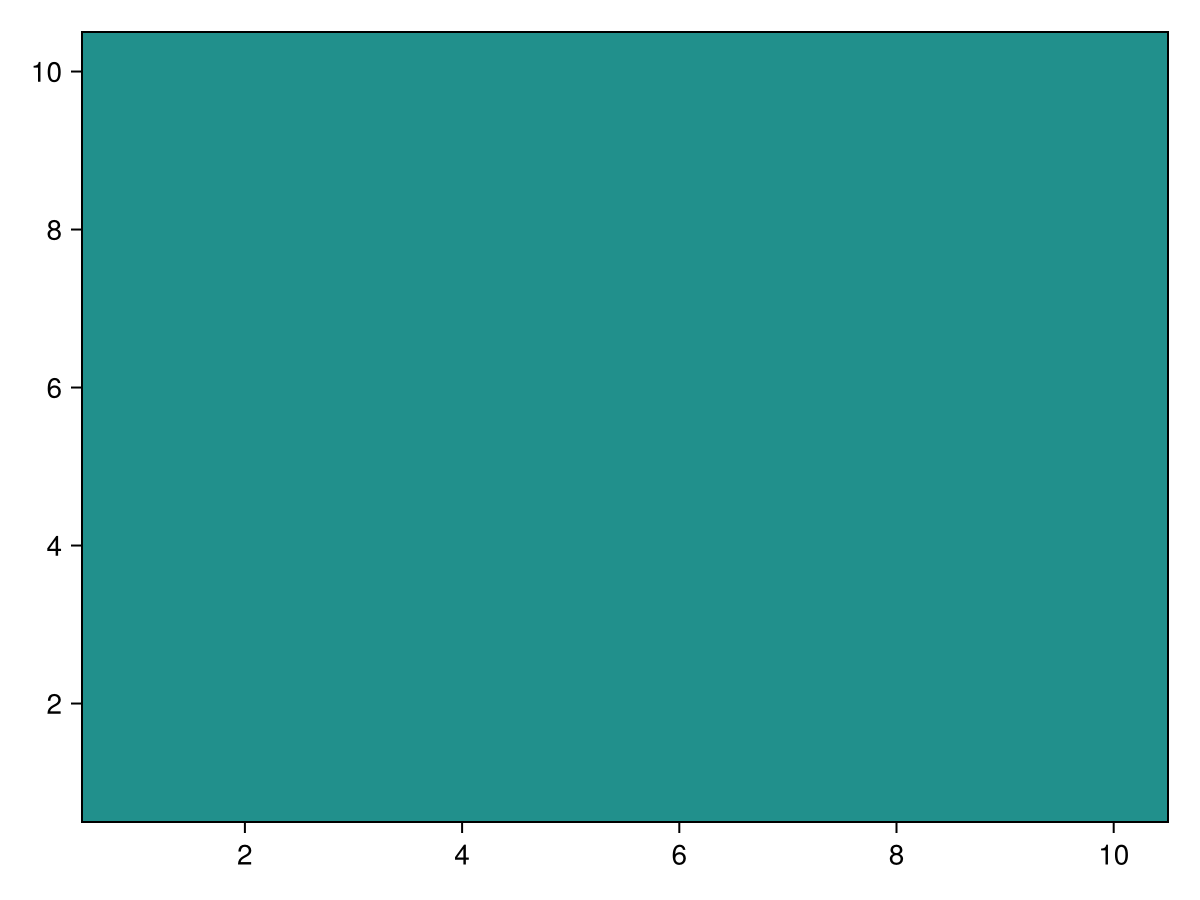

In [109]:
x = round.(res[:,:,:],digits = 1) 

[unique(x[i,j,:]) |> length for i = 1:Ns, j = 1:Ns] |> heatmap

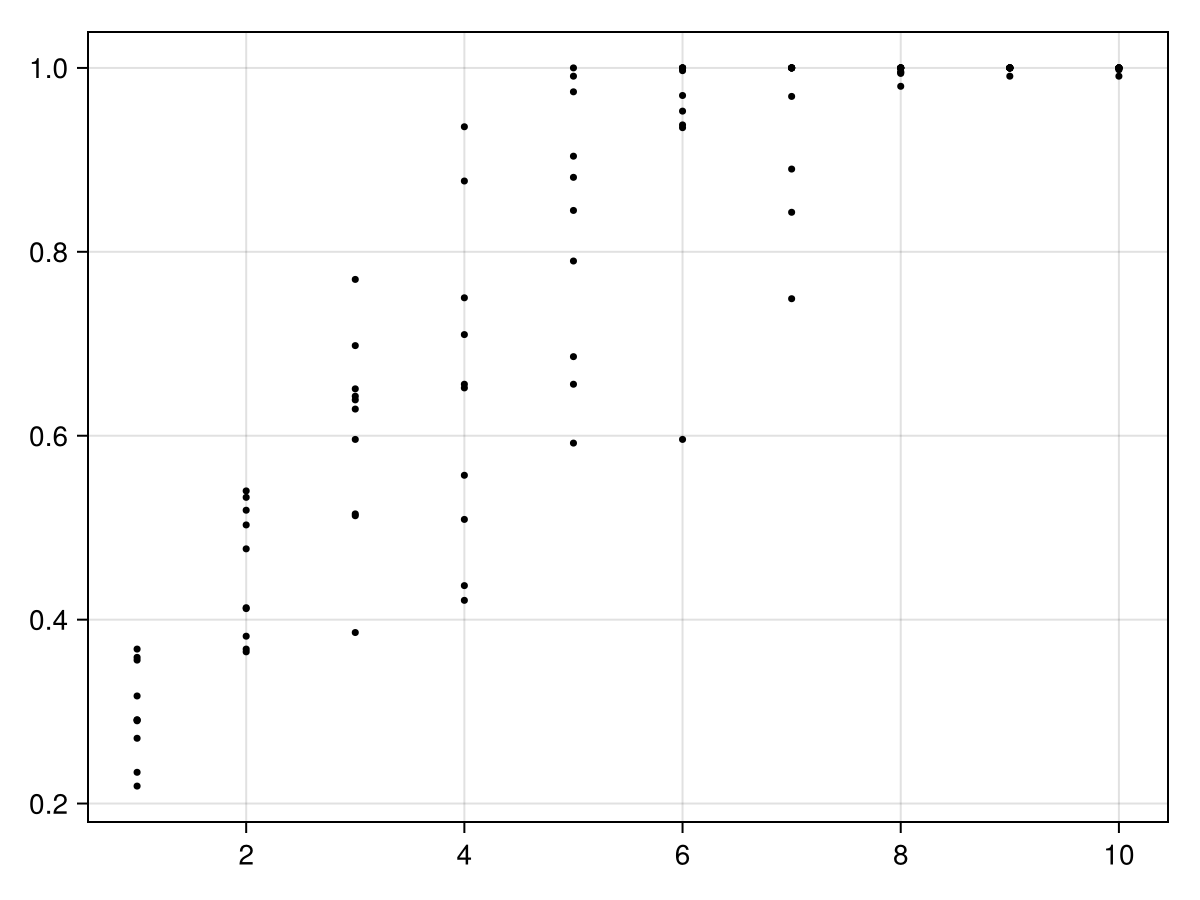

In [84]:
series(res[1,:,:]', solid_color = :black, markersize = 5, linewidth = 0)